Random Forest Mean Squared Error: 950.9538818382658
Random Forest R-squared: 0.5657737351970612


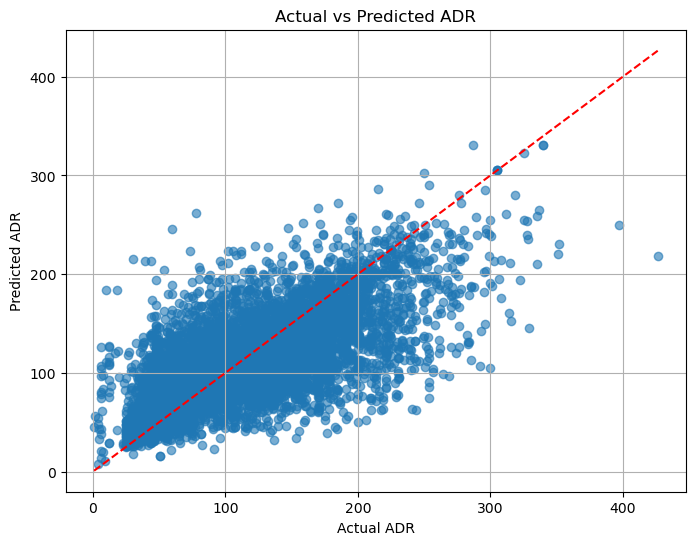

In [30]:
from IPython.display import display, HTML

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df=pd.read_csv("hotel_bookings.csv")
df["stays_in_total_nights"]=df["stays_in_week_nights"]+df["stays_in_weekend_nights"]


non_canceled_df=df[(df["is_canceled"] == 0) & (df["adr"] != 0)]
canceled_df=df[df["is_canceled"]==1]

adr_df=non_canceled_df[["hotel","lead_time","stays_in_total_nights","adults","children","babies","meal","country","reserved_room_type","deposit_type","agent","market_segment","distribution_channel","customer_type","adr","total_of_special_requests"]]
adr_df_dummy=pd.get_dummies(adr_df,columns=["hotel","meal","country","reserved_room_type","deposit_type","agent","market_segment","distribution_channel","customer_type"],drop_first=True)

x = adr_df_dummy.drop(columns=["adr"])
y = adr_df_dummy["adr"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train,y_train)
rf_y_pred = rf_model.predict(x_test)

rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"Random Forest Mean Squared Error: {rf_mse}")
print(f"Random Forest R-squared: {rf_r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual ADR")
plt.ylabel("Predicted ADR")
plt.title("Actual vs Predicted ADR")
plt.grid()
plt.savefig("adrmodelpredictionaccuracy.jpg")
plt.show()